In [97]:
import pandas as pd
import numpy as np

%pip install xlrd

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: C:\Users\Albin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [98]:
gez = pd.read_csv("gezondheid-2020.csv", sep=";", index_col="Codering_3")
kwb = pd.read_excel("kwb-2019.xls", index_col="gwb_code_10", decimal=",")


In [99]:
# Find the amount rows that does not exists in gez and kwb
miss_aligned_codes = set(gez.index) - set(kwb.index)
print(
    f"{len(miss_aligned_codes)} codes are missing from on or the other dataset. That equates to approximately {len(miss_aligned_codes) / len(gez.index) * 100:.3f}% of the codes."
)

# Drop the rows where the code is missing
kwb = kwb.drop(miss_aligned_codes, errors="ignore")
gez = gez.drop(miss_aligned_codes, errors="igore")

# The missing data is represented initially by a single dot. This will be replaced by np.nan, so that it can be correctly noted as missing and, handled appropiatley.
kwb = kwb.replace(".", np.nan)


524 codes are missing from on or the other dataset. That equates to approximately 3.022% of the codes.


## Load kwb-dataset


In [100]:
kwb.sample(5)


,gwb_code_8,regio,gm_naam,recs,gwb_code,ind_wbi,a_inw,a_man,a_vrouw,a_00_14,...,g_afs_kv,g_afs_sc,g_3km_sc,a_opp_ha,a_lan_ha,a_wat_ha,pst_mvp,pst_dekp,ste_mvs,ste_oad
gwb_code_10,,,,,,,,,,,,,,,,,,,,,
BU02220601,2220601,De Hoop-Noord,Doetinchem,Buurt,BU02220601,1,1015,500,510,155,...,1.2,0.4,11.1,36,34,2,7006,1,3,1343
GM0397,397,Heemstede,Heemstede,Gemeente,GM0397,NaN,27286,12900,14386,4826,...,0.6,0.6,14.7,964,918,47,NaN,NaN,2,1760
BU03637301,3637301,Schellingwoude Oost,Amsterdam,Buurt,BU03637301,1,605,295,305,135,...,1.5,1.9,7.6,68,66,2,1023,1,4,986
BU19001408,19001408,Verspreide huizen Burgwerd,Súdwest-Fryslân,Buurt,BU19001408,1,70,40,35,10,...,4.3,4.5,0.1,716,702,14,8742,1,5,24
WK038302,38302,Wijk 02 Castricum-Oost,Castricum,Wijk,WK038302,1,8470,4100,4370,1180,...,0.5,0.4,8.3,227,222,5,NaN,NaN,2,1774


## Load gezondheid-dataset


In [101]:
gez.sample(5)


,ID,Leeftijd,Marges,WijkenEnBuurten,Perioden,Gemeentenaam_1,WekelijkseSporters_6,Eenzaam_28
Codering_3,,,,,,,,
BU04390303,35999,20300,MW00000,BU04390303,2020JJ00,Purmerend,56.4,44.0
BU03638603,4223,20300,MW00000,BU03638603,2020JJ00,Amsterdam,67.2,50.1
BU06420206,51503,20300,MW00000,BU06420206,2020JJ00,Zwijndrecht,38.7,53.1
BU04060409,24383,20300,MW00000,BU04060409,2020JJ00,Huizen,60.9,35.8
BU00370500,39821,20300,MW00000,BU00370500,2020JJ00,Stadskanaal,35.0,45.7


In [102]:
# Drop unnecessary columns
gez = gez.drop(
    ["ID", "Leeftijd", "Marges", "Perioden", "Gemeentenaam_1", "WijkenEnBuurten"],
    axis=1,
    errors="ignore",
)


In [103]:
gez.info()


<class 'pandas.core.frame.DataFrame'>
Index: 16817 entries, GM1680 to BU01935210
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   WekelijkseSporters_6  16817 non-null  object
 1   Eenzaam_28            16817 non-null  object
dtypes: object(2)
memory usage: 394.1+ KB


In [104]:
# Fix wrong dtype on the columns
wrong_dtype = ["WekelijkseSporters_6", "Eenzaam_28"]
gez[wrong_dtype] = gez[wrong_dtype].replace(" .", np.nan)
gez[wrong_dtype] = gez[wrong_dtype].astype(float)


In [105]:
round(gez.describe(), 2)


,WekelijkseSporters_6,Eenzaam_28
count,16127.00,16127.00
mean,48.52,44.08
std,7.70,6.38
min,14.70,22.30
25%,43.30,39.40
50%,48.10,42.70
75%,53.50,47.70
max,75.40,79.50


In [106]:
gez.isna().sum() / len(gez) * 100


WekelijkseSporters_6    4.102991
Eenzaam_28              4.102991
dtype: float64

# Combine the Data


In [107]:
combined = kwb.copy()
combined[["sporting", "loneliness"]] = gez[["WekelijkseSporters_6", "Eenzaam_28"]]


In [108]:
combined.head()


,gwb_code_8,regio,gm_naam,recs,gwb_code,ind_wbi,a_inw,a_man,a_vrouw,a_00_14,...,g_3km_sc,a_opp_ha,a_lan_ha,a_wat_ha,pst_mvp,pst_dekp,ste_mvs,ste_oad,sporting,loneliness
gwb_code_10,,,,,,,,,,,,,,,,,,,,,
NL00,0,Nederland,Nederland,Land,NL00,NaN,17282163,8581086,8701077,2739819,...,10.9,4154338,3367109,787228,NaN,NaN,2,1994,NaN,NaN
GM0003,3,Appingedam,Appingedam,Gemeente,GM0003,NaN,11721,5720,6001,1718,...,6.4,2458,2378,80,NaN,NaN,3,1067,36.3,49.4
WK000300,300,Wijk 00,Appingedam,Wijk,WK000300,1,11720,5720,6000,1715,...,6.4,2458,2378,80,NaN,NaN,3,1067,36.3,49.4
BU00030000,30000,Appingedam-Centrum,Appingedam,Buurt,BU00030000,1,2370,1135,1230,230,...,7.1,90,84,5,9901,1,3,1210,35.4,51.6
BU00030001,30001,Appingedam-West,Appingedam,Buurt,BU00030001,1,3035,1505,1530,480,...,4.0,163,158,5,9903,6,4,903,41.5,41.5


In [109]:
# Drop the first row, as it contains data for the whole Netherlands.
combined = combined.drop("NL00", errors="ignore")

# List of columns in combined, that is not needed

columns_to_drop = [
    "gwb_code_8",
    "regio",
    "gm_naam",
    "recs",
    "gwb_code",
    "ind_wbi",
    "pst_mvp",
    "pst_dekp",
]

combined = combined.drop(columns_to_drop, axis=1, errors="ignore")


In [110]:
combined.info()


<class 'pandas.core.frame.DataFrame'>
Index: 17113 entries, GM0003 to BU19782004
Columns: 102 entries, a_inw to loneliness
dtypes: float64(18), int64(36), object(48)
memory usage: 13.4+ MB


In [111]:
combined = combined.apply(pd.to_numeric)
combined.info()


<class 'pandas.core.frame.DataFrame'>
Index: 17113 entries, GM0003 to BU19782004
Columns: 102 entries, a_inw to loneliness
dtypes: float64(66), int64(36)
memory usage: 13.4+ MB


# Missing Data


In [112]:
# Percent of missing data
print(
    round(
        combined.isna().sum().replace(0, np.nan).dropna() / len(combined) * 100, 3
    ).sort_values(ascending=False)
)

# Since we have data that are missing in the "predict" columns, we will drop those rows.
# Reason for having missing data there is most probably because of a missmatch in the gemeente codes from 2019 (kwb-dataset) and 2020 (gezondheid-dataset), and for the fact that some data was retracted for privacy reasons. This data was either way based on a small region, so it might even be good that it is removed.

combined = combined.dropna(subset=["sporting", "loneliness"])


g_ink_pi    100.000
p_hh_hi     100.000
a_inkont    100.000
g_ink_po    100.000
p_ink_hi    100.000
             ...   
g_3km_sc      3.939
bev_dich      3.892
g_hhgro       2.115
ste_oad       0.397
ste_mvs       0.386
Length: 66, dtype: float64


In [113]:
# Get all the columns with the proportion of missing values
combined_missing_proportion = (
    combined.isna().sum().replace(0, np.nan).dropna() / len(combined) * 100
)

# Drop the columns that have more than 25 percent missing values
columns_to_drop = combined_missing_proportion[combined_missing_proportion > 25].index
combined = combined.drop(columns=columns_to_drop)
print(f"Dropping {len(columns_to_drop)} columns")

# Percent of missing data
print(round(combined.isna().sum().replace(0, np.nan).dropna() / len(combined) * 100, 3))


Dropping 22 columns
g_hhgro      0.062
bev_dich     0.161
g_woz       17.077
p_1gezw      5.134
p_mgezw      5.134
p_bewndw     5.134
p_leegsw     5.134
p_koopw      5.159
p_huurw      5.159
p_wcorpw     5.159
p_ov_hw      5.159
p_e_o_w      5.159
p_bjj2k      5.134
p_bjo2k      5.134
g_ele        2.728
g_ele_vw    18.044
g_ele_hu    18.801
g_ele_ko     4.136
g_gas        4.508
g_gas_vw    18.974
g_gas_hu    20.500
g_gas_ko     5.779
a_soz_wb     4.905
a_soz_ao     4.905
a_soz_ww     4.905
a_soz_ow     4.905
a_bed_a     12.836
a_bed_bf    12.836
a_bed_gi    12.836
a_bed_hj    12.836
a_bed_kl    12.836
a_bed_mn    12.836
a_bed_ru    12.836
g_pau_hh    14.473
g_pau_km    14.473
g_afs_hp     0.211
g_afs_gs     0.211
g_afs_kv     0.211
g_afs_sc     0.211
g_3km_sc     0.211
ste_mvs      0.012
ste_oad      0.012
dtype: float64


In [114]:
missing_data_sum = []
steps = [i for i in range(1, 40)]

for i in steps:
    missing_data_sum.append(
        combined.dropna(thresh=combined.shape[1] - i)
        .isna()
        .sum()
        .replace(0, np.nan)
        .dropna()
        .sum()
    )


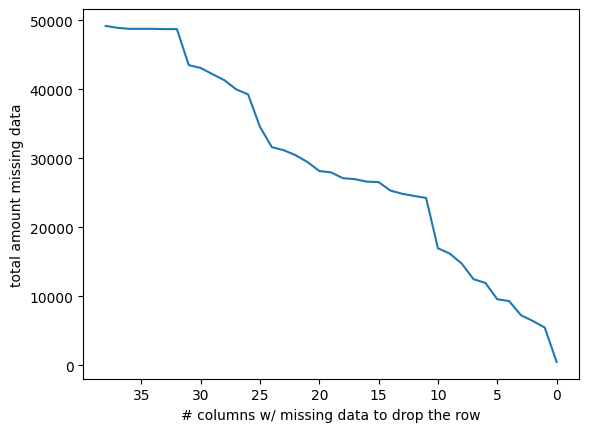

In [115]:
import seaborn as sb
import matplotlib.pyplot as plt

plt.plot(missing_data_sum)
plt.xlabel("# columns w/ missing data to drop the row")
plt.ylabel("total amount missing data")
plt.gca().invert_xaxis()
plt.savefig("missing_row_plot.png")


In [116]:
# No missing data left!
combined.isna().sum().sum()


49488

In [117]:
combined.to_csv("pre-processed-data.csv")


In [118]:
combined.info()


<class 'pandas.core.frame.DataFrame'>
Index: 16127 entries, GM0003 to BU19782004
Data columns (total 80 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   a_inw       16127 non-null  int64  
 1   a_man       16127 non-null  int64  
 2   a_vrouw     16127 non-null  int64  
 3   a_00_14     16127 non-null  int64  
 4   a_15_24     16127 non-null  int64  
 5   a_25_44     16127 non-null  int64  
 6   a_45_64     16127 non-null  int64  
 7   a_65_oo     16127 non-null  int64  
 8   a_ongeh     16127 non-null  int64  
 9   a_gehuwd    16127 non-null  int64  
 10  a_gesch     16127 non-null  int64  
 11  a_verwed    16127 non-null  int64  
 12  a_w_all     16127 non-null  int64  
 13  a_nw_all    16127 non-null  int64  
 14  a_marok     16127 non-null  int64  
 15  a_antaru    16127 non-null  int64  
 16  a_suri      16127 non-null  int64  
 17  a_tur       16127 non-null  int64  
 18  a_ov_nw     16127 non-null  int64  
 19  a_geb       16127 no

<AxesSubplot: >

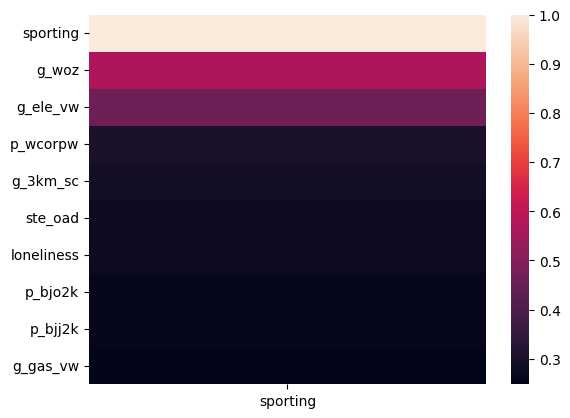

In [119]:
# Ignore

import seaborn as sb

corr = abs(combined.corr())

sb.heatmap(corr[["sporting"]].sort_values(by="sporting", ascending=False)[:10])


<AxesSubplot: >

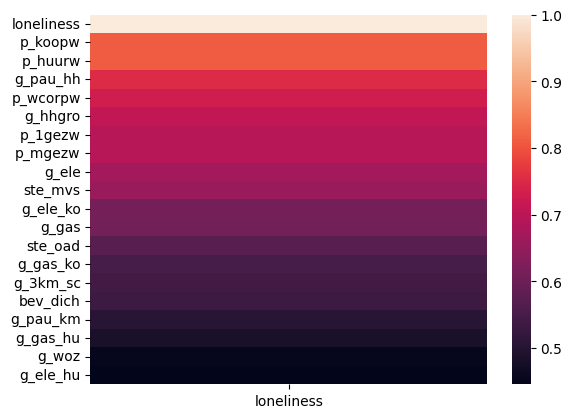

In [120]:
sb.heatmap(corr[["loneliness"]].sort_values(by="loneliness", ascending=False)[:20])
